Patients loaded: 102

Health Clinic Summary Report
----------------------------------------
Heart Rate Mean: 82.24
Heart Rate Median: 81.0
Heart Rate Mode: [67]

Temperature Mean: 36.20
Temperature Median: 36.349999999999994
Temperature Mode: [36.6, 35.5]

High-Risk Patients
----------------------------------------
No abnormal patients detected.


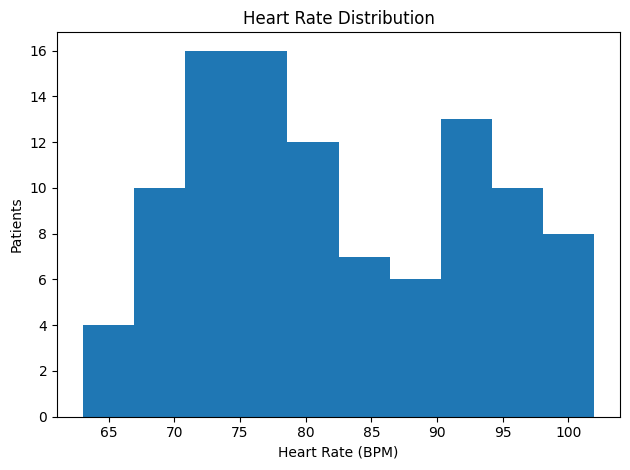

In [1]:
import csv
import matplotlib.pyplot as plt

# -------------------------------
# DATA INGESTION
# -------------------------------
def load_data(filepath):
    """Load patient data from CSV and clean numeric values."""
    patients = []

    try:
        with open(filepath) as csvfile:
            reader = csv.DictReader(csvfile)

            for row in reader:
                try:
                    patient = {
                        "patient_id": int(row["patient_id"]),
                        "age": int(row["age"]),
                        "systolic_bp": int(row["systolic_bp"]),
                        "heart_rate": int(row["heart_rate"]),
                        "oxygen_saturation": int(row["oxygen_saturation"]),
                        "temperature": float(row["temperature"])
                    }
                    patients.append(patient)

                except ValueError:
                    print("Value Error")

    except FileNotFoundError:
        print("File not found.")

    return patients

# -------------------------------
# STATISTICAL ANALYSIS
# -------------------------------

"""Returns the arithmetic mean."""
def calculate_mean(values):
    return sum(values) / len(values) if values else 0

"""Sorts the list and finds the middle value."""
def calculate_median(values):
    sorted_vals = sorted(values)
    n = len(sorted_vals)
    mid = n // 2
    return (sorted_vals[mid - 1] + sorted_vals[mid]) / 2 if n % 2 == 0 else sorted_vals[mid]

"""Returns the most frequent value"""
def calculate_mode(values):
    freq = {}
    for v in values:
        freq[v] = freq.get(v, 0) + 1
    max_count = max(freq.values())
    return [k for k, v in freq.items() if v == max_count]

# -------------------------------
# OUTLIER DETECTION (IQR)
# -------------------------------
def calculate_outlier_stats(values):
    sorted_vals = sorted(values)
    n = len(sorted_vals)

    def median(data):
        m = len(data)
        mid = m // 2
        return data[mid] if m % 2 else (data[mid-1] + data[mid]) / 2

    Q1 = median(sorted_vals[:n//2])
    Q3 = median(sorted_vals[(n+1)//2:])
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return {
        "low": lower,
        "high": upper,
        "outliers": [v for v in values if v < lower or v > upper]
    }

# -------------------------------
# RISK CLASSIFICATION
# -------------------------------
def get_severity(patient):
    hr = patient["heart_rate"]
    temp = patient["temperature"]
    sys = patient["systolic_bp"]

    if hr >= 120 or temp >= 39.5 or sys >= 180:
        return "Critical"
    elif hr > 100 or temp >= 38 or sys >= 140:
        return "High Risk"
    return "Normal"

def get_high_risk_patients(data, limits):
    high_risk = []

    for p in data:
        hr = p["heart_rate"]
        temp = p["temperature"]

        if (hr < limits["heart_rate"]["low"] or hr > limits["heart_rate"]["high"] or
            temp < limits["temperature"]["low"] or temp > limits["temperature"]["high"]):
            high_risk.append(p)

    return high_risk

# -------------------------------
# REPORT GENERATION
# -------------------------------
def generate_summary_report(data):
    heart_rates = [p["heart_rate"] for p in data]
    temps = [p["temperature"] for p in data]

    hr_stats = calculate_outlier_stats(heart_rates)
    temp_stats = calculate_outlier_stats(temps)

    print("\nHealth Clinic Summary Report")
    print("-" * 40)
    print(f"Heart Rate Mean: {calculate_mean(heart_rates):.2f}")
    print(f"Heart Rate Median: {calculate_median(heart_rates)}")
    print(f"Heart Rate Mode: {calculate_mode(heart_rates)}")

    print(f"\nTemperature Mean: {calculate_mean(temps):.2f}")
    print(f"Temperature Median: {calculate_median(temps)}")
    print(f"Temperature Mode: {calculate_mode(temps)}")

    # -------------------
    # HIGH RISK PATIENTS
    # -------------------
    limits = {"heart_rate": hr_stats, "temperature": temp_stats}
    high_risk = get_high_risk_patients(data, limits)

    print("\nHigh-Risk Patients")
    print("-" * 40)

    if not high_risk:
        print("No abnormal patients detected.")
    else:
        for p in high_risk:
            severity = get_severity(p)
            print(f"ID {p['patient_id']} | HR {p['heart_rate']} | Temp {p['temperature']} | {severity}")

    # -------------------
    # VISUALIsATION
    # -------------------
    plt.figure()
    plt.hist(heart_rates, bins=10)
    plt.title("Heart Rate Distribution")
    plt.xlabel("Heart Rate (BPM)")
    plt.ylabel("Patients")
    plt.tight_layout()
    plt.show()

# -------------------------------
# EXECUTION
# -------------------------------
patients = load_data("data/patient_vitals.csv")
print("Patients loaded:", len(patients))

if patients:
    generate_summary_report(patients)